In [1]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np
from keras.preprocessing import image

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, 
                             input_shape = (64, 64, 3), 
                             activation = 'relu'))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128, 
                     activation = 'relu'))
classifier.add(Dense(output_dim = 7, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

W0717 00:43:12.608352 11964 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  import sys
W0717 00:43:12.622314 11964 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 00:43:12.624310 11964 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 00:43:12.641329 11964

In [4]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset7/train_set7',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset7/test_set7',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

Found 2468 images belonging to 7 classes.
Found 983 images belonging to 7 classes.


In [5]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 200,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 20)

W0717 00:43:18.142805 11964 deprecation.py:323] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0717 00:43:18.184733 11964 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
200/200 [==============================] - 382s 2s/step - loss: 0.4423 - acc: 0.8627 - val_loss: 0.1009 - val_acc: 0.9781
Epoch 2/10
200/200 [==============================] - 305s 2s/step - loss: 0.0442 - acc: 0.9928 - val_loss: 0.0614 - val_acc: 0.9937
Epoch 3/10
200/200 [==============================] - 310s 2s/step - loss: 0.0159 - acc: 0.9966 - val_loss: 0.0380 - val_acc: 0.9938
Epoch 4/10
200/200 [==============================] - 309s 2s/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0422 - val_acc: 0.9905
Epoch 5/10
200/200 [==============================] - 311s 2s/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 0.9984
Epoch 6/10
200/200 [==============================] - 312s 2s/step - loss: 9.5514e-04 - acc: 1.0000 - val_loss: 0.0385 - val_acc: 0.9922
Epoch 7/10
200/200 [==============================] - 313s 2s/step - loss: 6.9345e-04 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 0.9952
Epoch 8/10
200/200 [==============================] - 311s 2s

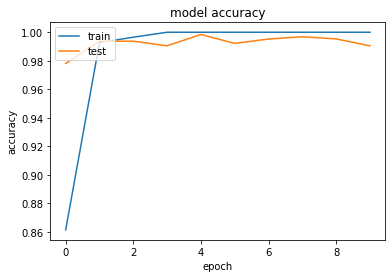

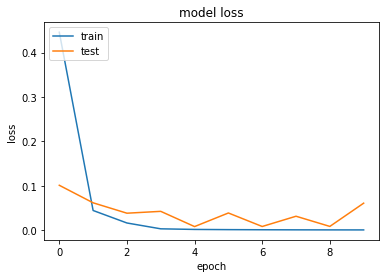

In [6]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
# save model and architecture to single file
classifier.save("model.h7")
print("Saved model to disk")

Saved model to disk


In [2]:
# load and evaluate a saved model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from numpy import loadtxt
from keras.models import load_model
 
# load model
classifier = load_model('model.h7')

W0717 23:30:35.561879  1488 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 23:30:35.699298  1488 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 23:30:35.723199  1488 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0717 23:30:35.811066  1488 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0717 

In [53]:
test_image = load_img('C:/Users/ASUS/Desktop/Research/Image Dataset/7/IMG_4595.jpg', target_size = (64, 64))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict_classes(test_image)

print(result)

[2]


In [54]:
if result == 0:
    prediction = 'Sign 1'
elif result == 1:
    prediction = 'Sign 2'
elif result == 2:
    prediction = 'Sign 3'
elif result == 3:
    prediction = 'Sign 4'
elif result == 4:
    prediction = 'Sign 5'
elif result == 5:
     prediction = 'Sign 6'
else:
     prediction = 'Sign 7'

print(prediction)

Sign 3
